# Imports

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import celltypist
import anndata as ad
from scipy import sparse
from anndata import AnnData
import celltypist

/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/cip/home/p/pohll/mambaforge/envs/xie_env/lib/

# load data

In [2]:
# read merged adata
adata = sc.read("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")

In [3]:
alignment = celltypist.DistanceAlignment.load('/home/p/pohll/Desktop/MP/data/celltypist_alignment.pkl')

# update Schiller anno

In [5]:
adata.obs.loc[(adata.obs['dataset'] == 'schiller') &
      # (adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'Myofibroblasts'), # Interstitial macrophages
       'harmonized_anno'] = 'Interstitial macrophages'

adata.obs.loc[(adata.obs['dataset'] == 'schiller') &
      # (adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'Myofibroblasts'),
       'manual_celltype_annotation'] = 'Interstitial macrophages'


In [16]:
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=np.inf)

In [23]:
print(adata.obs["manual_celltype_annotation"].cat.categories)


Index(['AT1', 'AT2', 'Adventitial fibroblasts', 'Aerocytes',
       'Alveolar fibroblasts', 'Alveolar macrophages', 'B-cells',
       'CD4 T-cells', 'Classical monocytes', 'Dendritic cells',
       'Dendritic cells Ccr7-hi', 'Dendritic cells pDC', 'Endothelial',
       'Epithelial', 'Interstitial macrophages', 'Lymphatic endothelial',
       'Myofibroblasts', 'NA', 'NK cells', 'Neutrophils',
       'Non-classical monocytes', 'Peribronchial fibroblasts', 'SMCs',
       'T-cells', 'Transitioning epithelial'],
      dtype='object')


In [24]:
adata.obs.loc[(adata.obs['dataset'] == 'schiller') &
      # (adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'NA'), # Interstitial macrophages
       'harmonized_anno'] = 'T-cells'

adata.obs.loc[(adata.obs['dataset'] == 'schiller') &
      # (adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'NA'),
       'manual_celltype_annotation'] = 'T-cells'

# harmonization using celltypist

## alignment 

In [58]:
alignment = celltypist.harmonize(adata, 'dataset', 'manual_celltype_annotation')


👀 Detected PCA coordinates in the object, will use these to calculate distances
🏆 Reordering datasets
🖇 Harmonizing cell types of tsukui and xie
🖇 Harmonizing cell types of misharin
🖇 Harmonizing cell types of peyser
🖇 Harmonizing cell types of schiller
🖋️ Reannotating cells
✅ Harmonization done!


In [59]:
alignment

Cross-dataset cell type alignment for 5 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'tsukui', 'xie', 'misharin', 'peyser', 'schiller'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

In [63]:
alignment.write('/home/p/pohll/Desktop/MP/data/celltypist_alignment.pkl')

In [65]:
alignment.reannotation

dataset                  cell_type  \
ID                                                            
AAACCTGAGGACATTA-1_xie       xie             Myofibroblasts   
AAACCTGCAGTCGTGC-1_xie       xie  Peribronchial fibroblasts   
AAACCTGCATGAAGTA-1_xie       xie       Alveolar macrophages   
AAACCTGTCTCGCATC-1_xie       xie  Peribronchial fibroblasts   
AAACGGGTCCTAGAAC-1_xie       xie  Peribronchial fibroblasts   
...                          ...                        ...   
29291_schiller          schiller       Alveolar fibroblasts   
29292_schiller          schiller                        AT2   
29293_schiller          schiller       Alveolar fibroblasts   
29294_schiller          schiller                        AT2   
29295_schiller          schiller                         NA   

                                                             reannotation  \
ID                                                                          
AAACCTGAGGACATTA-1_xie  Adventitial fibroblasts ∈ Myofibroblasts ∈ Myo...   
AAACCTGCAGTCGTGC-1_xie  Peribronchial fibroblasts = Peribronchial fibr...   
AAACCTGCATGAAGTA-1_xie  UNRESOLVED = Alveolar macrophages = Alveolar m...   
AAACCTGTCTCGCATC-1_xie  Peribronchial fibroblasts = Peribronchial fibr...   
AAACGGGTCCTAGAAC-1_xie  Peribronchial fibroblasts = Peribronchial fibr...   
...                                                                   ...   
29291_schiller          UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOL...   
29292_schiller                  Epithelial = AT2 = AT2 ∈ Epithelial = AT2   
29293_schiller          UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOL...   
29294_schiller                  Epithelial = AT2 = AT2 ∈ Epithelial = AT2   
29295_schiller             T-cells = T-cells = T-cells = CD4 T-cells = NA   

                          group  
ID                               
AAACCTGAGGACATTA-1_xie   Group1  
AAACCTGCAGTCGTGC-1_xie  Group13  
AAACCTGCATGAAGTA-1_xie  Group16  
AAACCTGTCTCGCATC-1_xie  Group13  
AAACGGGTCCTAGAAC-1_xie  Group13  
...                         ...  
29291_schiller          Group20  
29292_schiller           Group7  
29293_schiller          Group20  
29294_schiller           Group7  
29295_schiller          Group18  

[93103 rows x 4 columns]

In [79]:
alignment.reannotation["group"].unique()

array(['Group1', 'Group13', 'Group16', 'Group4', 'Group2', 'Group15',
       'Group3', 'Group6', 'Group5', 'Group18', 'Group7', 'Group12',
       'Group14', 'Group8', 'Group17', 'Group9', 'Group10', 'Group11',
       'Group21', 'Group19', 'Group20', 'Group22'], dtype=object)

In [66]:
adata.obs[['low_hierarchy', 'high_hierarchy']] = alignment.reannotation.loc[adata.obs_names, ['reannotation', 'group']]

## visualize alignment distances 

In [6]:
dist_mat = alignment.base_distance.to_meta()
member_mat = alignment.base_distance.to_meta(turn_binary = True)

In [71]:
plt.figure(figsize=(3,3))

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

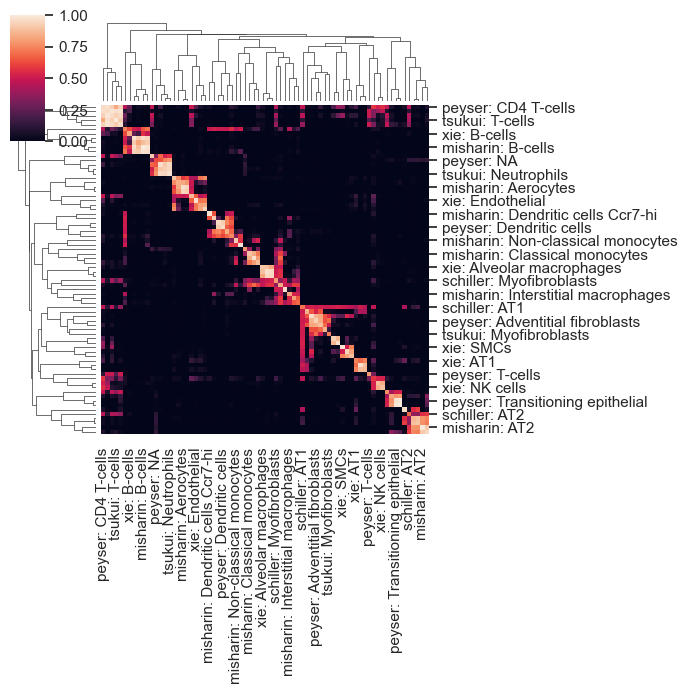

In [74]:
sns.clustermap(member_mat, figsize=(7, 7))

In [ ]:
flag = member_mat.index.str.contains('Dendritic')
sns.clustermap(member_mat.loc[flag,flag], figsize=(6, 6))

## alignment treeplot

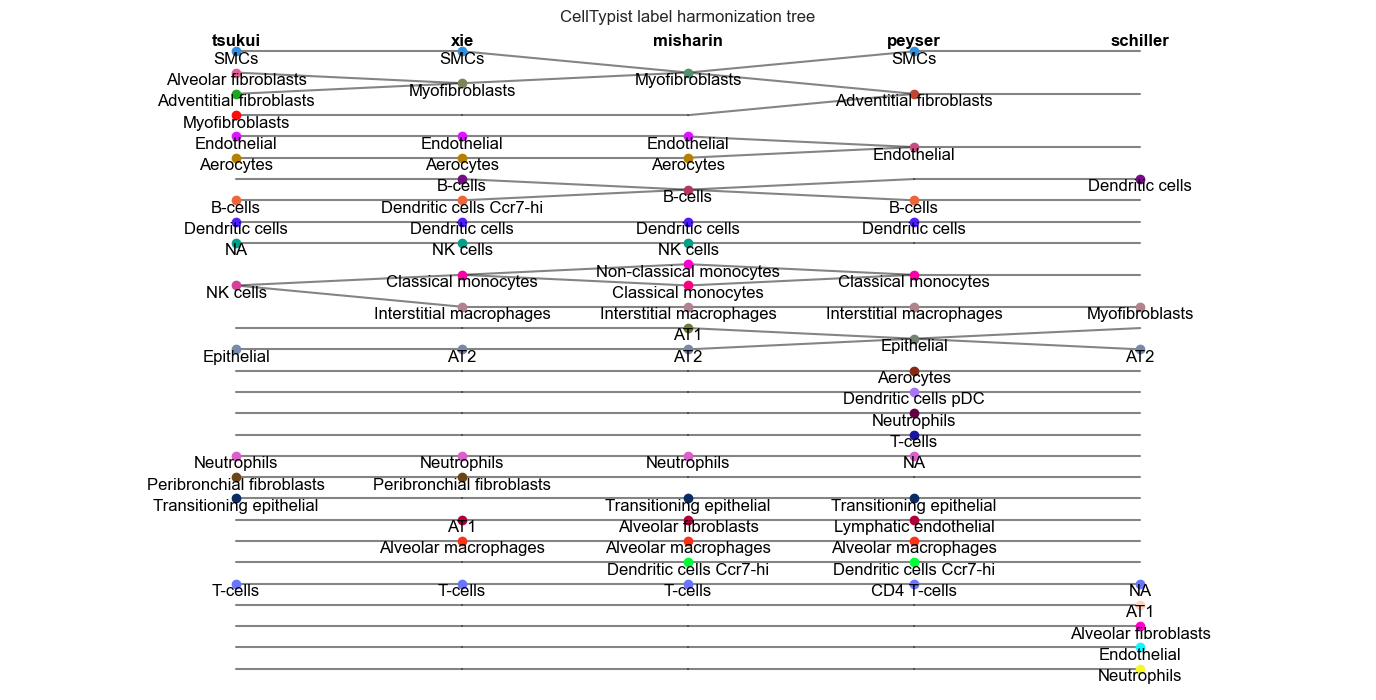

In [77]:
celltypist.treeplot(alignment)

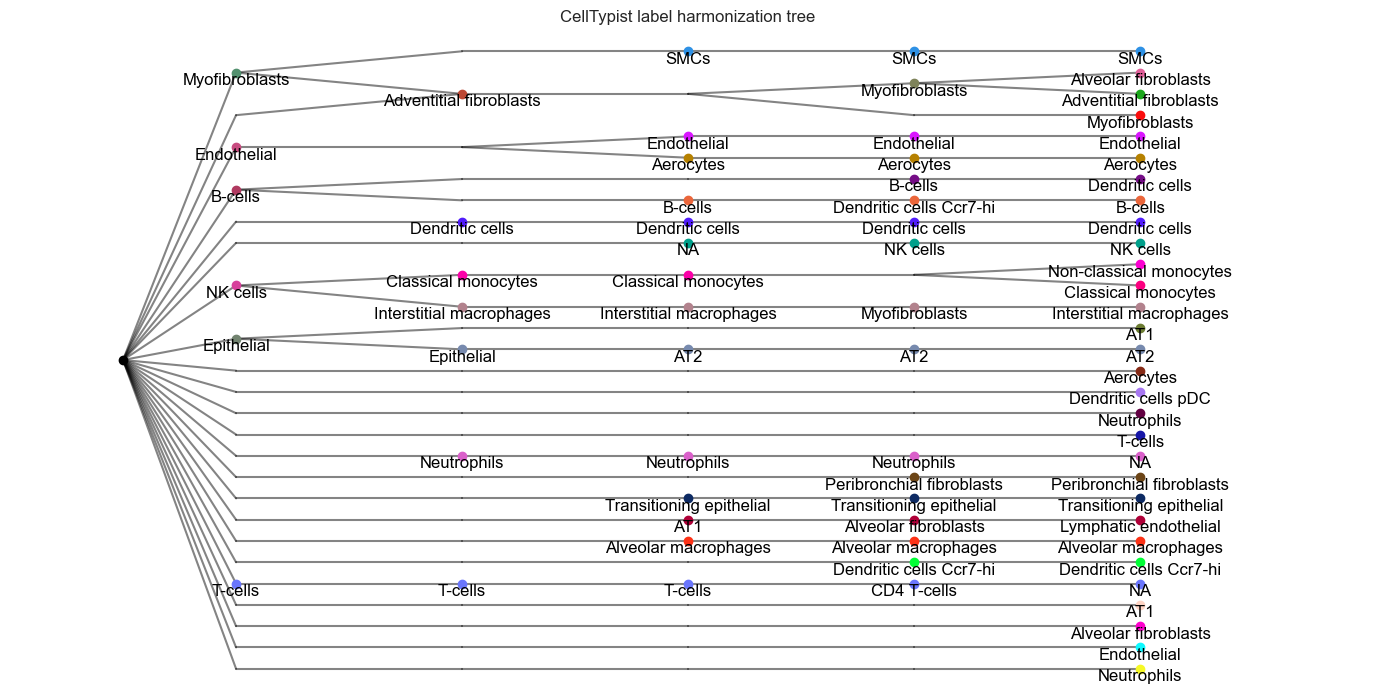

In [78]:
celltypist.treeplot(alignment, order_dataset = True)

In [92]:
alignment

Cross-dataset cell type alignment for 5 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'tsukui', 'xie', 'misharin', 'peyser', 'schiller'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

## check poorly/non-mapping populations 

### UMAPs

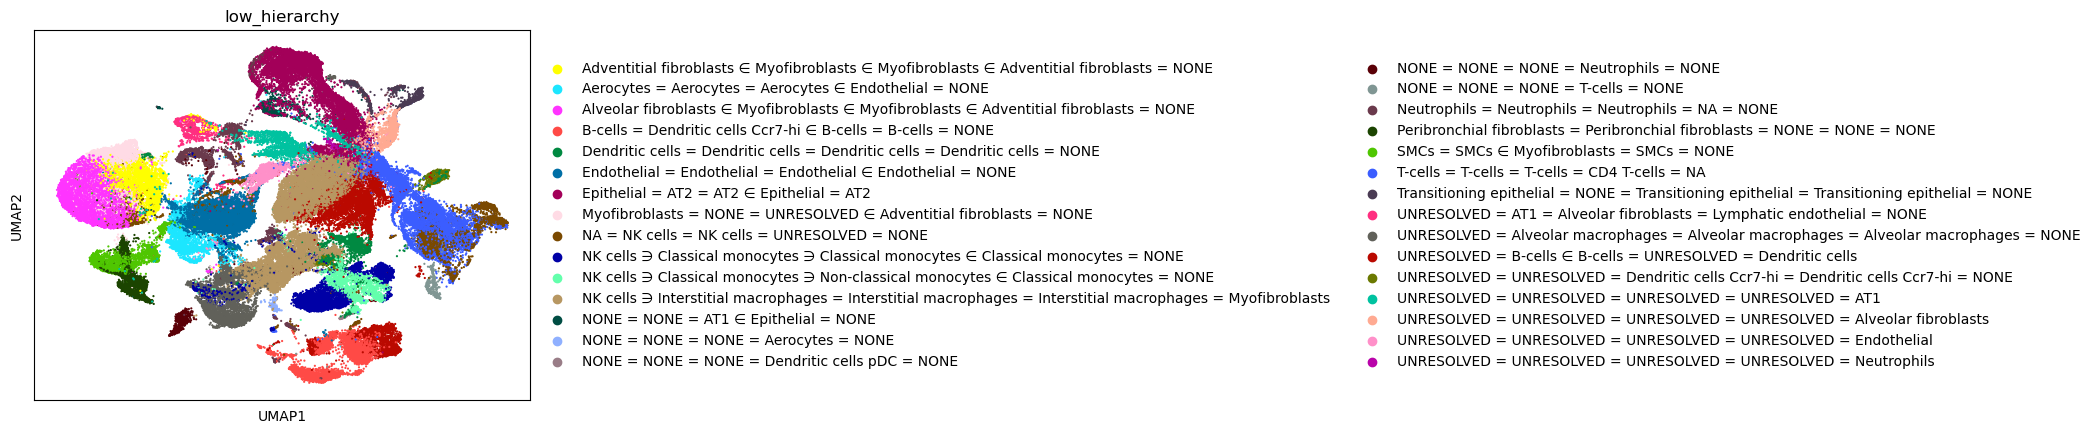

In [10]:
sc.pl.umap(adata, color=['low_hierarchy'], size=10)

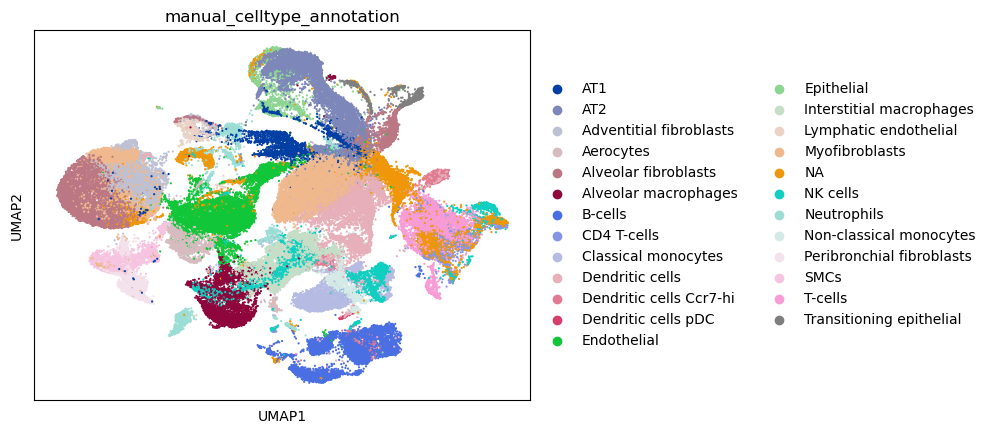

In [12]:
sc.pl.umap(adata, color=['manual_celltype_annotation'], size=10)

mismatch At1, Alveolar fbroblasts, Lymphatic endothelial --> all in one "population" but different annnotation 

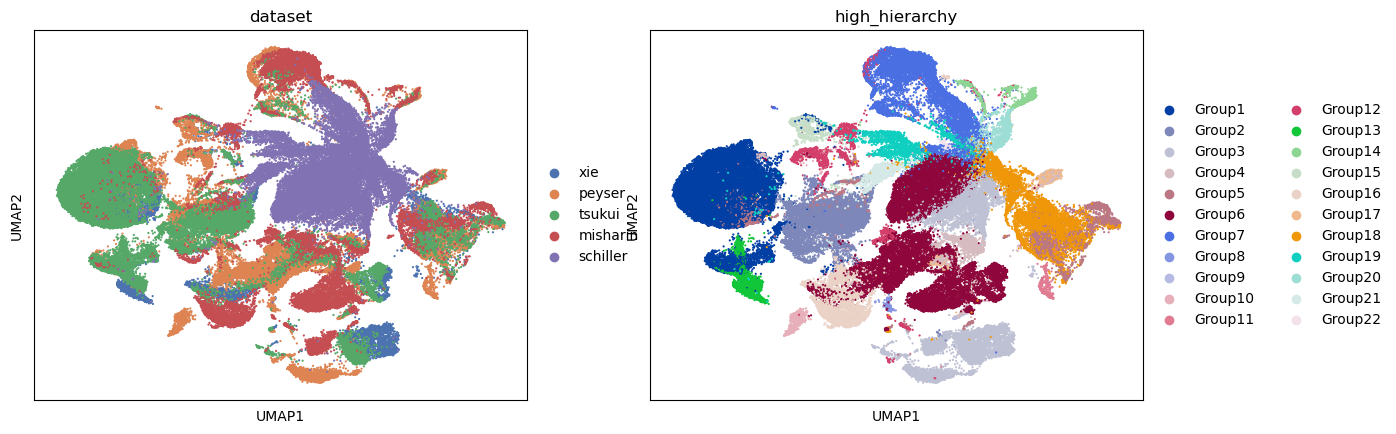

In [127]:
sc.pl.umap(adata, color=['dataset', 'high_hierarchy'], size=10)

In [72]:
#adata.write("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")

### Overview dotplot of all marker genes and celltypist grouping

In [28]:
all_marker_genes = {
  "AT1": ["S100a6", "Ager", "Pdpn", "Vegfa"],
  "AT2": ["Muc1", "Sftpc", "Sftpd", "Cxcl15", "Lcn2"],
  "Transitioning epithelial": ["Krt8", "Krt18"],
  "Epithelial": ["Epcam", "Cdh1"],
  "Alveolar macrophages": ["Marco", "Chil3", "Fabp4", "Siglecf", "Il18", "Ear1", "Fabp1", "Car4", "Ctsk", "Chil3", "S100a1", "Wfdc21", "Itgam", "Cd36", "Gpnmb", "Bhlhe41", "Klf9"],
    #"Litaf", "Jund", "Bhlhe40" , "Atf3", "Atf4"
  "Interstitial macrophages": ["Trem2", "C1qa"],
  "Classical monocytes": ["F13a1", "Ly6c2"],
  "Non-classical monocytes": ["Treml4", "Fcgr3"],
  "Dendritic cells": ["Clec9a", "H2-Aa"],
  "Dendritic cells pDC": ["Siglech", "Clec4b1"],#  Clec4b1 instead of Clec4c
  "Dendritic cells Ccr7-hi": ["Ccr7"],
  "CD4 T-cells": ["Cd4", "Cd3e", "Cd3d"],
  "CD8 T-cells": ["Cd8a", "Cd3d"],
  "NK cells": ["Tyrobp", "Gzma", "Nkg7"],
  "B-cells": ["Cd79a", "Cd19", "Ms4a1"],
  "Neutrophils": ["S100a8", "S100a9"],
  "Endothelial": ["Pecam1", "Ly6c1"], # Pecam1 instead of Pecam4
  "Lymphatic endothelial": ["Pdpn"],
  "Aerocytes": ["Car4", "Ednrb"],
  "Pericytes": ["Vtn", "Mcam", "Cspg4"],
  "Lipofibroblasts": ["Plin2", "Lpl", "Tcf21"],
  "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2"],
  "Alveolar fibroblast": ["Npnt", "Ces1d", "Slc7a10"],
  "Adventitial fibroblast": ["Pi16", "Dcn", "Il33", "Ccl11", "Adh7"],
  "Peribronchial fibroblasts": ["Hhip", "Aspn", "Fgf18", "Lgr5", "Lgr6"],
  "SMCs": ["Acta2", "Tagln", "Myh11"]
}

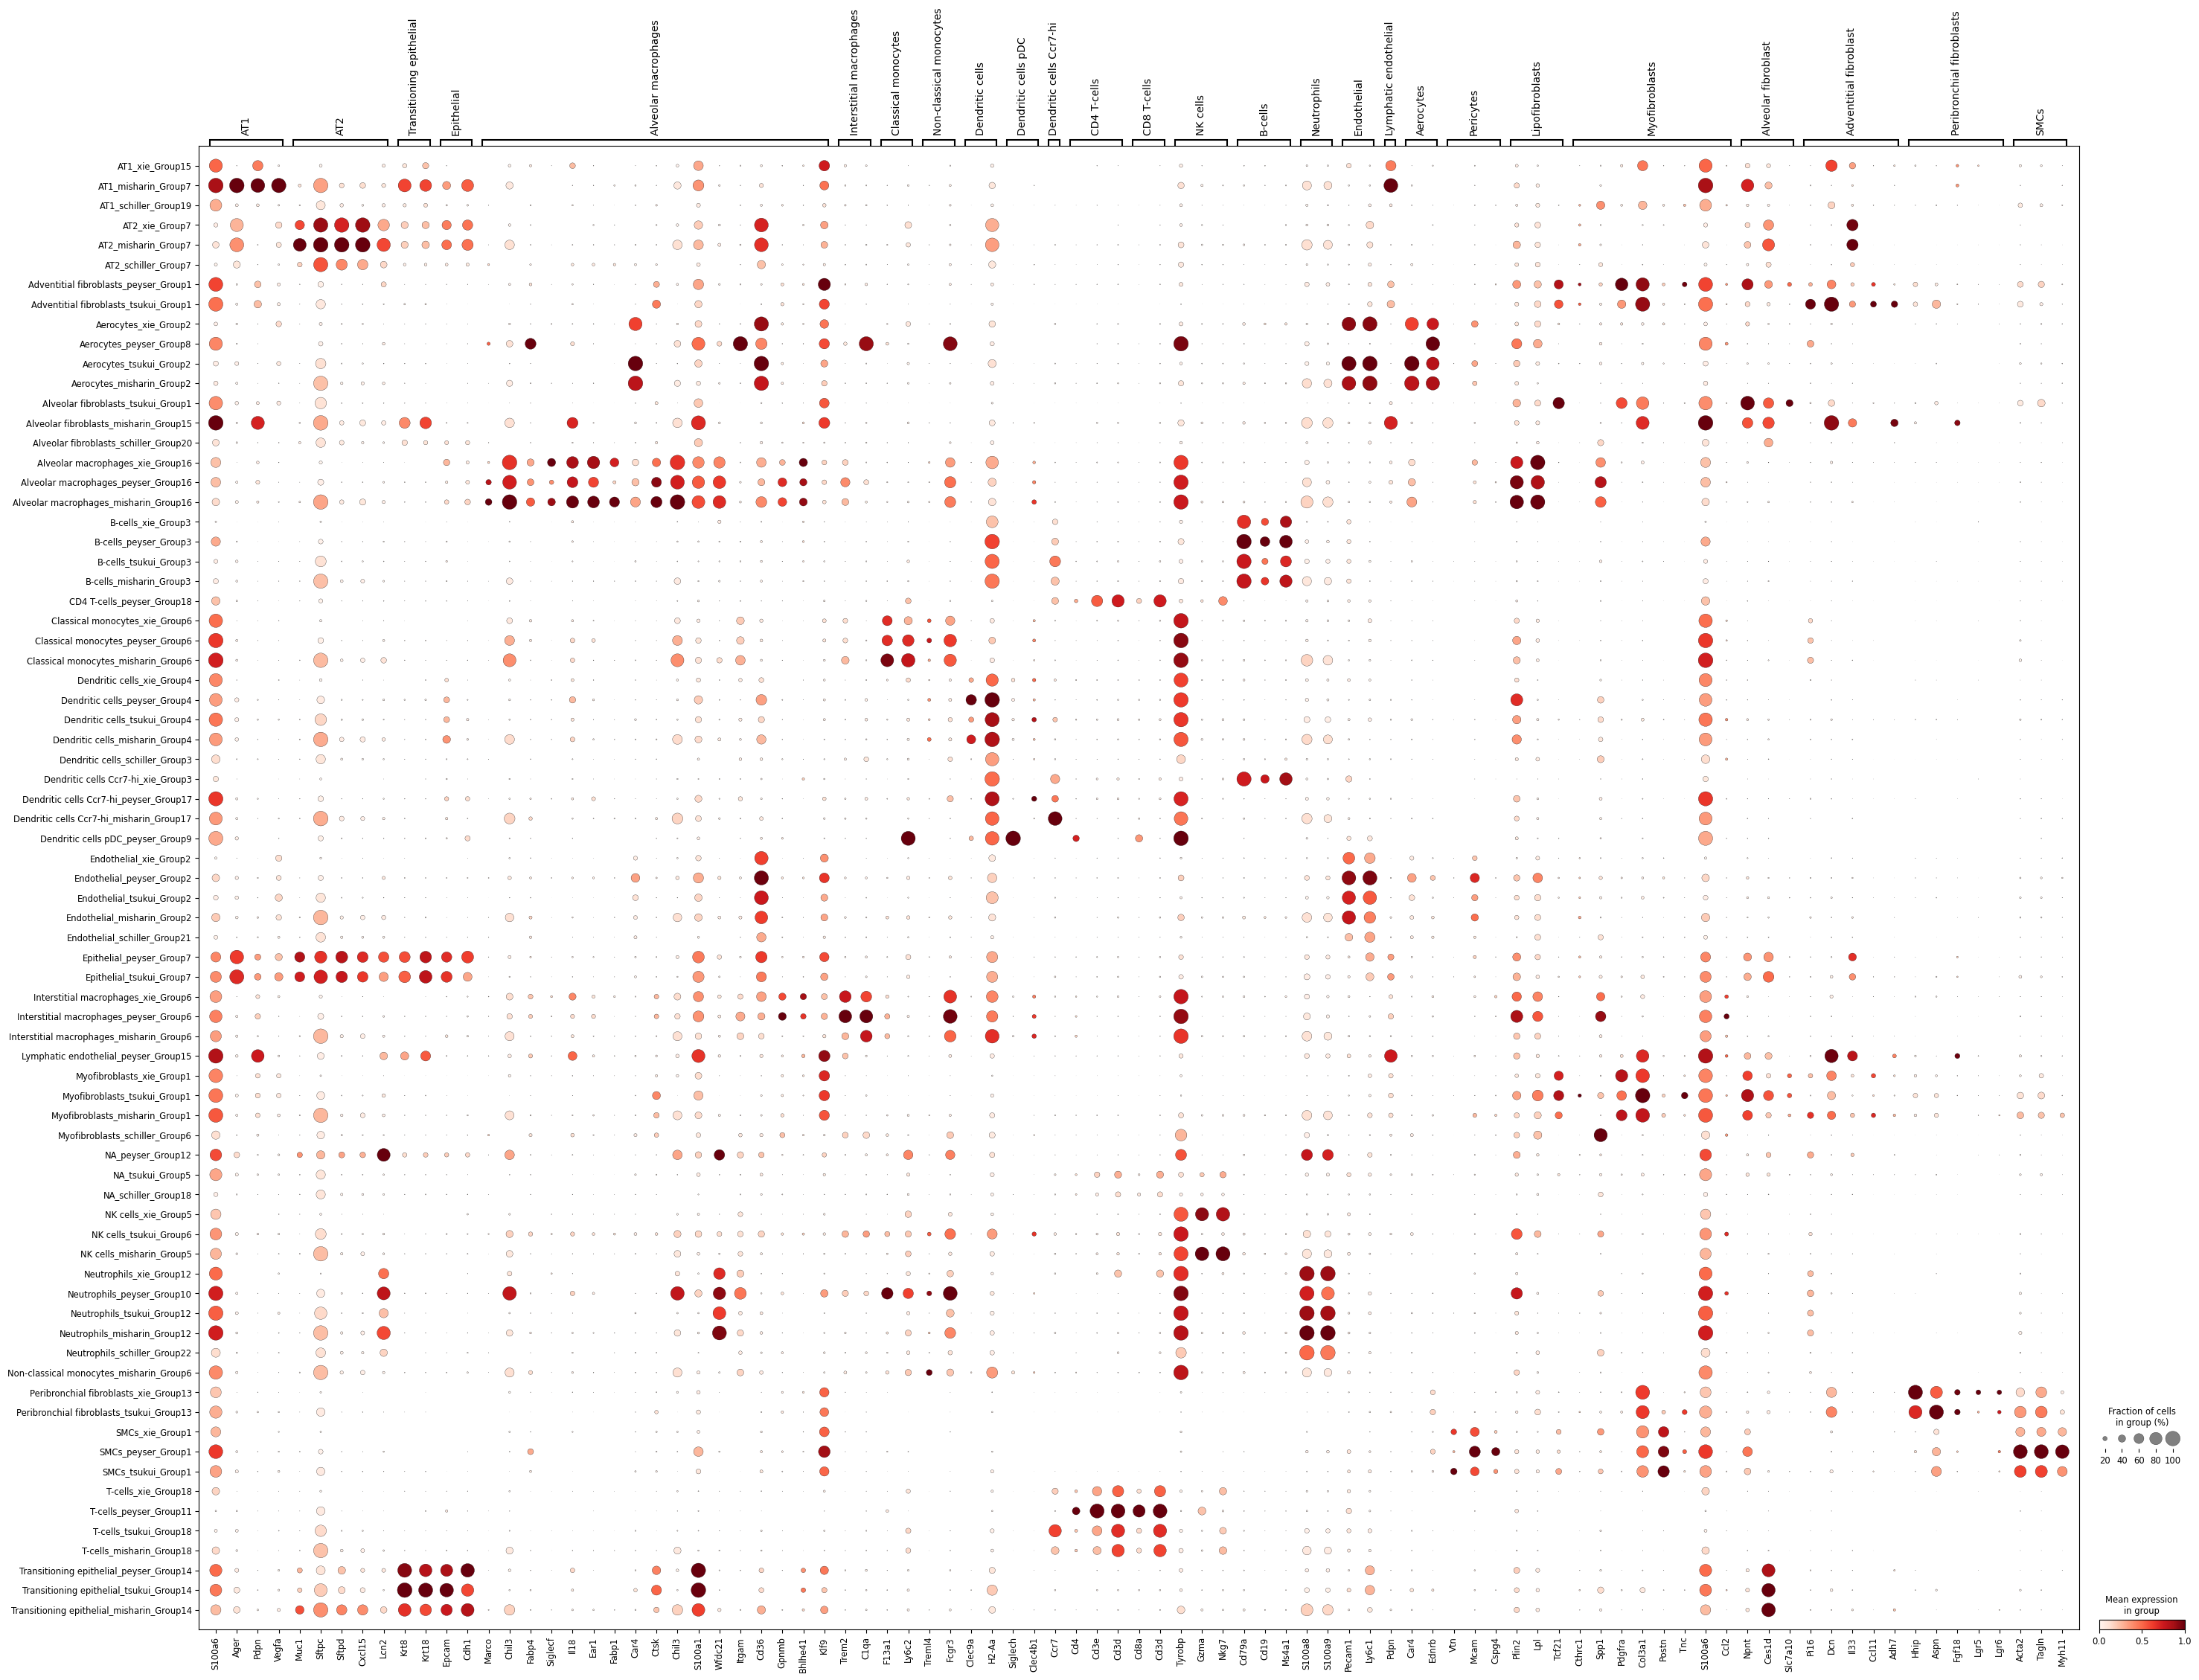

In [133]:
sc.pl.dotplot(adata, all_marker_genes, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


### Fibroblast Group Problem 

added HLCA marker genes 

In [67]:
fibroblast_dict = {
    "Pericytes": ["Vtn", "Mcam", "Cspg4", "Cox4i2","Higd1b","Ndufa4l2","Pag1","Kcnk3","Egfl6","Ptn","Rgn","Lamc3","Gja4"],
    "Lipofibroblasts": ["Plin2", "Lpl", "Tcf21"], 
    "Myofibroblasts": ["Cthrc1", "Spp1", "Pdgfra", "Col3a1", "Postn", "Tnc", "S100a6", "Ccl2", "Aspn", "Bche", "Itgbl1", "Myh11"],
    "Alveolar fibroblast": ["Npnt", "Ces1d", "Slc7a10", "Gpc3","Scn7a","Limch1", "Cdh11","Plekhh2","Myh10","Angpt1","Aoc3","G0s2"],
    "Adventitial fibroblast": ["Pi16", "Dcn", "Il33", "Ccl11", "Adh7", "Mgst1","Sfrp2","Scara5","Mfap5","Fbln2","Uap1","Slpi","Ptgis","Pcolce2"],
    "Peribronchial fibroblasts": ["Hhip", "Aspn", "Fgf18", "Lgr5", "Lgr6", "Cxcl14","Aspn","Scgb1a1"],
    "SMCs": ["Acta2", "Tagln", "Myh11","Tinagl1","Actg2","Tm4sf1","Lmod1","Cox4i2","Csrp2","Mcam","Cnn1"]    
}

In [129]:
alignment.relation[alignment.groups == 'Group1']

tsukui relation             xie relation        misharin  \
0   Adventitial fibroblasts        ∈  Myofibroblasts        ∈  Myofibroblasts   
2      Alveolar fibroblasts        ∈  Myofibroblasts        ∈  Myofibroblasts   
6            Myofibroblasts        =            NONE        =      UNRESOLVED   
17                     SMCs        =            SMCs        ∈  Myofibroblasts   

   relation                   peyser relation schiller  
0         ∈  Adventitial fibroblasts        =     NONE  
2         ∈  Adventitial fibroblasts        =     NONE  
6         ∈  Adventitial fibroblasts        =     NONE  
17        =                     SMCs        =     NONE

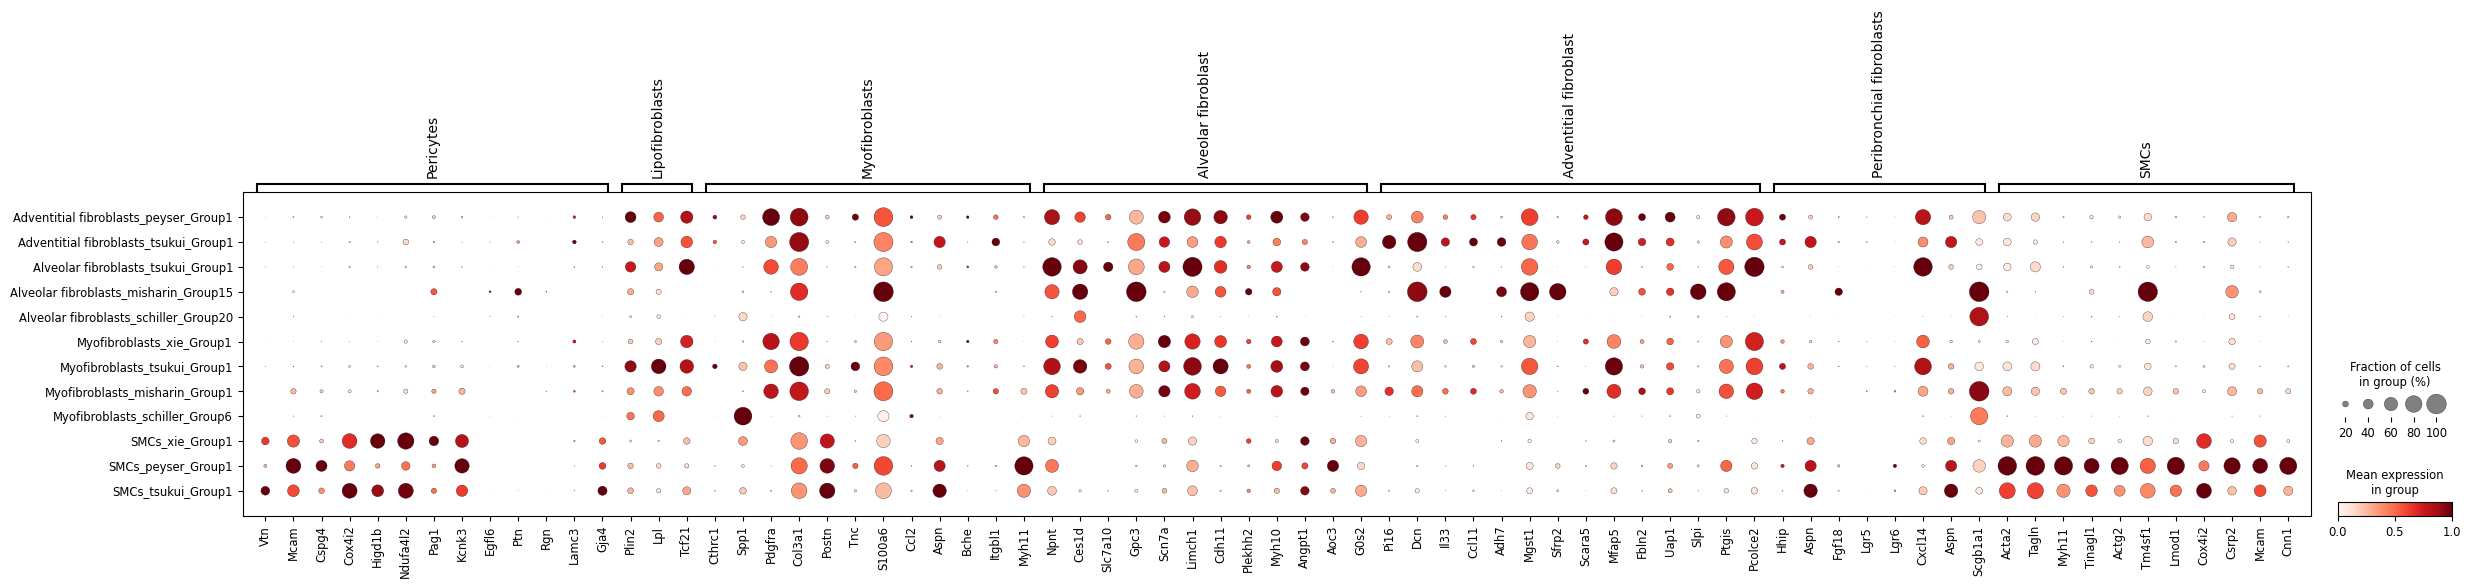

In [128]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["Myofibroblasts","Alveolar fibroblasts", "Adventitial fibroblasts", "SMCs" ])], fibroblast_dict, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")
# all_marker_genes, groupby='manual_celltype_annotation',  standard_scale="var") # todo subset to celltype of interest

- Misharin: a lot of fibroblast markers are expressed - how to annotate? Split cluster again or annotate as a coarser celltyper (fibroblast)?
- the same problem with a lot of different fibroblast markers expressed for tsukui myofibroblast, Alveolar fibroblasts and peyser Adventitial fibroblasts, xie and misharin myofibroblast

--> hard to distinguish between different fibroblast subtypes based on our markers and HLCA markers


### Endothelial Group 

In [56]:
alignment.relation[alignment.groups == 'Group2']

tsukui relation          xie relation     misharin relation  \
1    Aerocytes        =    Aerocytes        =    Aerocytes        ∈   
5  Endothelial        =  Endothelial        =  Endothelial        ∈   

        peyser relation schiller  
1  Endothelial        =     NONE  
5  Endothelial        =     NONE

In [63]:
alignment.relation[alignment.groups == 'Group8']

tsukui relation   xie relation misharin relation     peyser relation  \
11   NONE        =  NONE        =     NONE        =  Aerocytes        =   

   schiller  
11     NONE

In [59]:
endo_markers ={  "Endothelial": ["Pecam1", "Ly6c1"],"Aerocytes": ["Car4", "Ednrb"]}

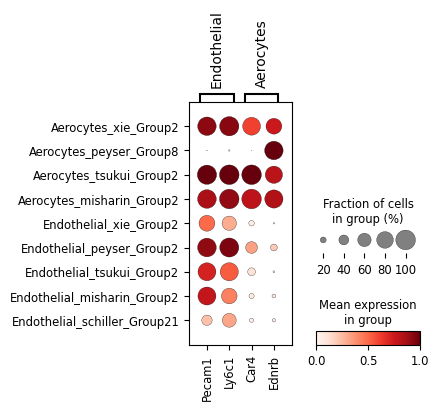

In [130]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["Endothelial","Aerocytes" ])], endo_markers, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


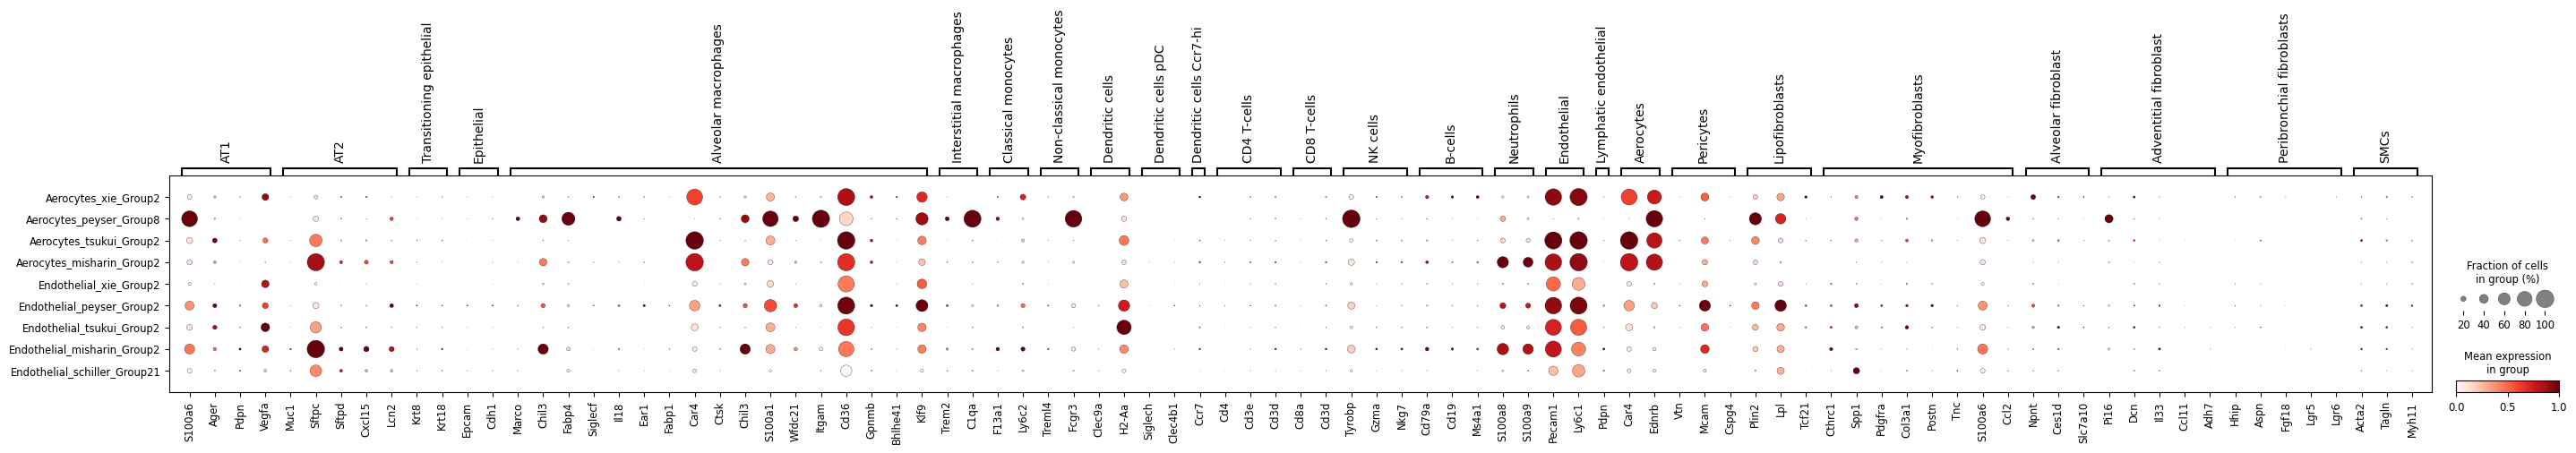

In [134]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["Endothelial","Aerocytes" ])], all_marker_genes, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


- Aerocytes_peyser_Group8 really aerocyetes? because no other endothelial markers expressed
- could also be macrophages/monocytes
- annotate peyser aerocytes as NA, seem to be immune cells, have look after integration

#### reannotation

In [25]:
adata.obs.loc[(adata.obs['dataset'] == 'peyser') &
      (adata.obs['high_hierarchy'] == 'Group8') &
       (adata.obs['manual_celltype_annotation'] == 'Aerocytes'), # Interstitial macrophages
       'harmonized_anno'] = 'NA'

### B cells and Dendritic

In [74]:
b_dend_markers = {"Dendritic cells": ["Clec9a", "H2-Aa"],
  "Dendritic cells pDC": ["Siglech", "Clec4b1"],#  Clec4b1 instead of Clec4c
  "Dendritic cells Ccr7-hi": ["Ccr7"],
  "B-cells": ["Cd79a", "Cd19", "Ms4a1"]}

In [77]:
alignment.relation[alignment.groups == 'Group3']

tsukui relation                      xie relation misharin relation  \
3     B-cells        =  Dendritic cells Ccr7-hi        ∈  B-cells        =   
1  UNRESOLVED        =                  B-cells        ∈  B-cells        =   

       peyser relation         schiller  
3     B-cells        =             NONE  
1  UNRESOLVED        =  Dendritic cells

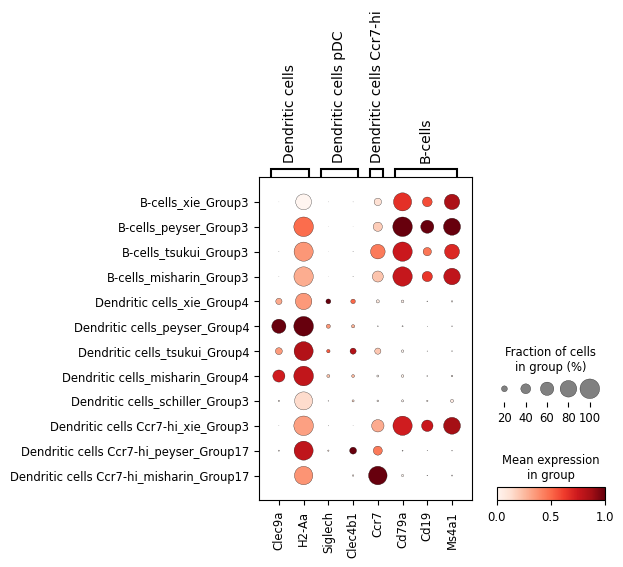

In [135]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["Dendritic cells", "Dendritic cells Ccr7-hi", "B-cells" ])], b_dend_markers, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


- in general: better to leave out ccr7? 
- Dendritic_cells_Ccr7-hi_xie_Group3 needs to be reannotated to B-cells


#### reannotation

In [83]:
adata.obs.loc[(adata.obs['dataset'] == 'xie') &
       (adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'Dendritic cells Ccr7-hi'),
       'harmonized_anno'] = 'B-cells'


In [84]:
changed_rows = adata.obs.loc[(adata.obs['dataset'] == 'xie') &
       (adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'Dendritic cells Ccr7-hi')]
changed_rows.head()

In [26]:
adata.obs.loc[#(adata.obs['dataset'] == 'schiller') &
      # (adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'Dendritic cells Ccr7-hi'), # Interstitial macrophages
       'harmonized_anno'] = 'Dendritic cells'

### NK cells monocytes, macrophages

In [87]:
alignment.relation[alignment.groups == 'Group5']

tsukui relation       xie relation  misharin relation      peyser relation  \
7     NA        =  NK cells        =  NK cells        =  UNRESOLVED        =   

  schiller  
7     NONE

In [91]:
alignment.relation[alignment.groups == 'Group6']

tsukui relation                       xie relation  \
8  NK cells        ∋       Classical monocytes        ∋   
9  NK cells        ∋       Classical monocytes        ∋   
0  NK cells        ∋  Interstitial macrophages        =   

                   misharin relation                    peyser relation  \
8       Classical monocytes        ∈       Classical monocytes        =   
9   Non-classical monocytes        ∈       Classical monocytes        =   
0  Interstitial macrophages        =  Interstitial macrophages        =   

         schiller  
8            NONE  
9            NONE  
0  Myofibroblasts

In [92]:
nk_markers = { "NK cells": ["Tyrobp", "Gzma", "Nkg7"],
             "Classical monocytes": ["F13a1", "Ly6c2"],
              "Interstitial macrophages": ["Trem2", "C1qa"],
             }

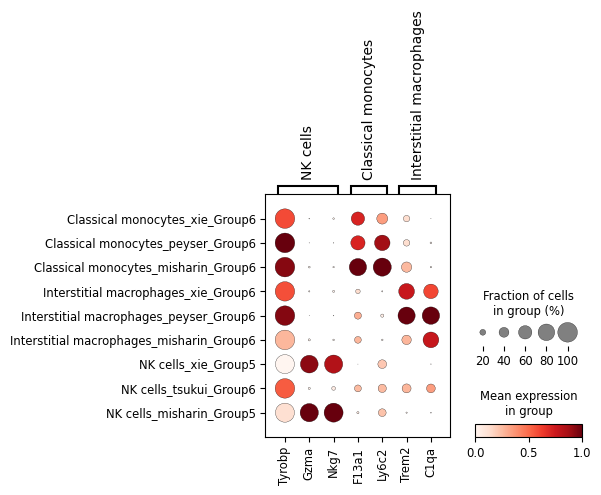

In [93]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["NK cells" , "Classical monocytes", "Interstitial macrophages"])], nk_markers, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


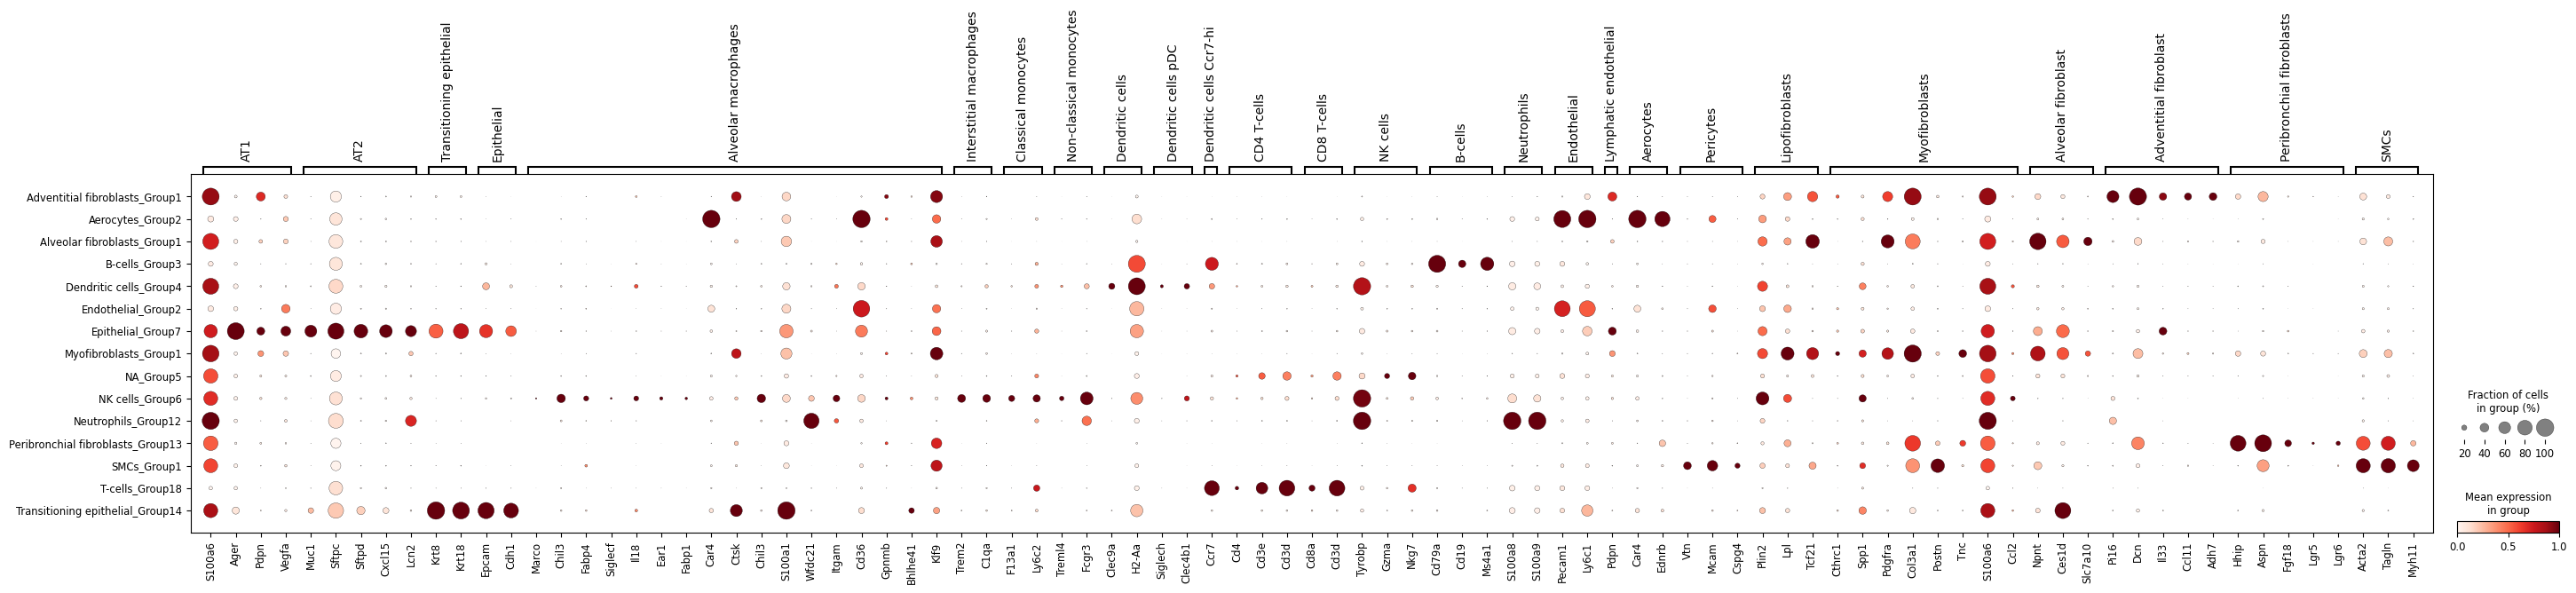

In [29]:
sc.pl.dotplot(adata[adata.obs["dataset"].isin(["tsukui"])], all_marker_genes, groupby=['manual_celltype_annotation', "high_hierarchy"],  standard_scale="var")


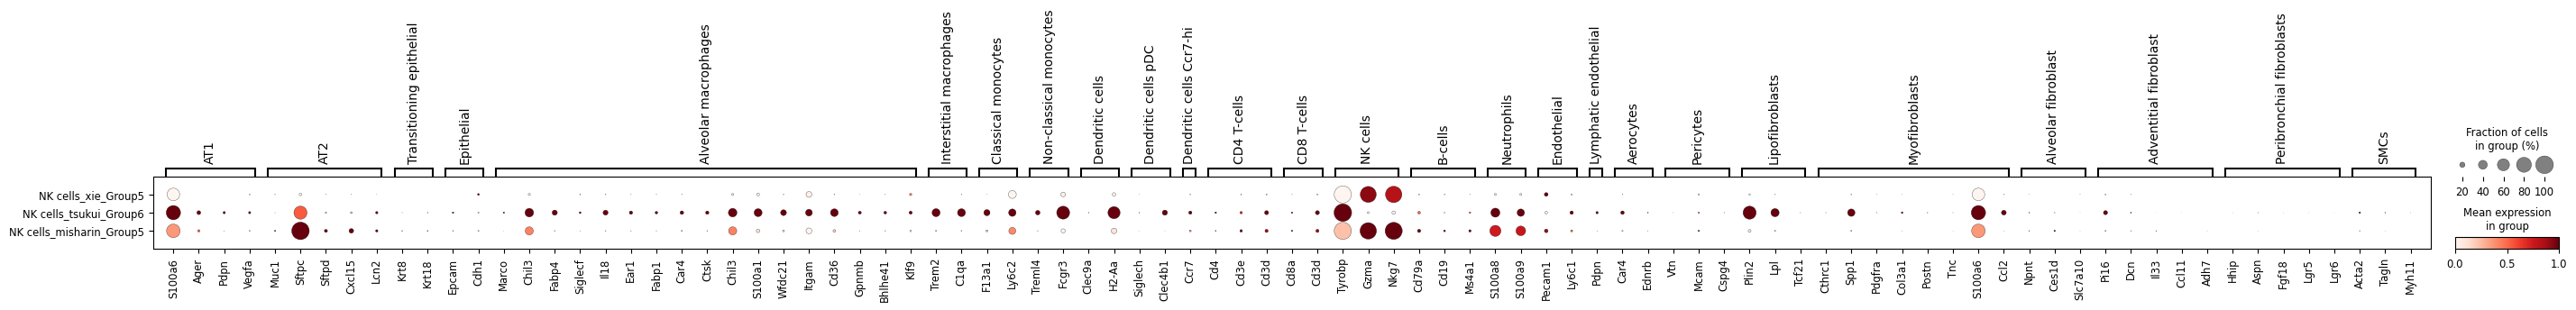

In [136]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["NK cells" ])], all_marker_genes, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


- Annotation seems to be fine (celltypist grouping misleading/confusing)
- except for tsukui - not clear --> NA 

#### reanno

In [30]:
# reannotate tsukui NK to NA 
adata.obs.loc[(adata.obs['dataset'] == 'tsukui') &
       (adata.obs['high_hierarchy'] == 'Group6') &
       (adata.obs['manual_celltype_annotation'] == 'NK cells'),
       'harmonized_anno'] = 'NA'

### Epithelial, AT1/2

In [95]:
alignment.relation[alignment.groups == 'Group7']

tsukui relation   xie relation misharin relation      peyser relation  \
10        NONE        =  NONE        =      AT1        ∈  Epithelial        =   
0   Epithelial        =   AT2        =      AT2        ∈  Epithelial        =   

   schiller  
10     NONE  
0       AT2

In [101]:
epi_markers = {
    "AT1": ["S100a6", "Ager", "Pdpn", "Vegfa", "Cav1","Myl9","Sfta2","Clic3","Spock2","Anxa3","Rtkn2","Timp3","Tnnc1"],
    "AT2": ["Muc1", "Sftpc", "Sftpd", "Cxcl15", "Lcn2", "Sftpb","Sftpc","Sftpa1", "Sfta2","Lamp3","Lrrk2","Tfpi","Mfsd2a"],
  "Transitioning epithelial": ["Krt8", "Krt18"],
  "Epithelial": ["Epcam", "Cdh1"],}

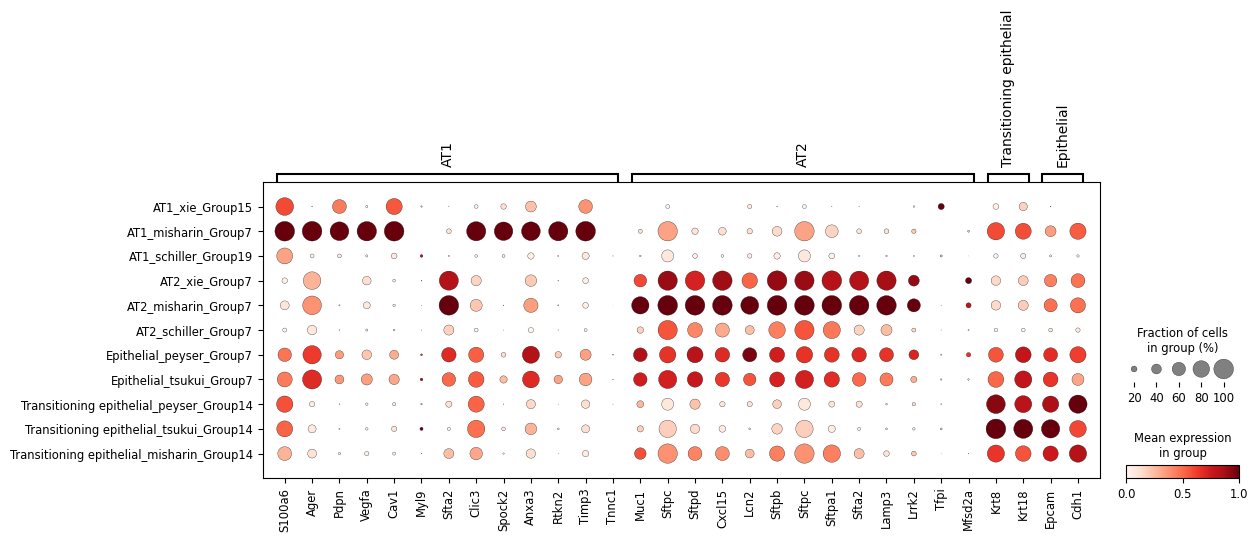

In [102]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["AT1" , "AT2", "Transitioning epithelial", "Epithelial"])], epi_markers, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


In [98]:
alignment.relation[alignment.groups == 'Group15']

tsukui relation  xie relation              misharin relation  \
19  UNRESOLVED        =  AT1        =  Alveolar fibroblasts        =   

                   peyser relation schiller  
19  Lymphatic endothelial        =     NONE

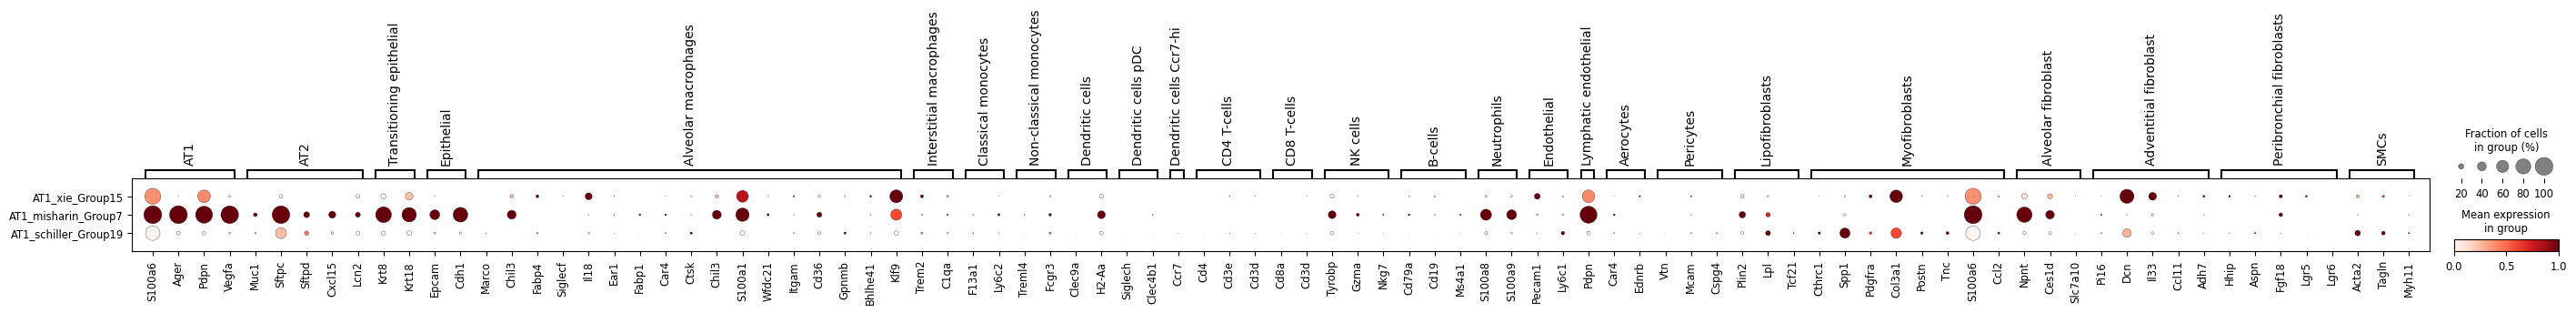

In [138]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["AT1" ])], all_marker_genes, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


- Ager not a good marker for AT1 (also high in AT2)
- maybe annotate all as epithelial since markers from every subtype are expressed (except from A1 misharin)
- xie At1 group 15, also annotation not clear , no genereal epithelial marker expression, maybe even lymphatic endothelial?

#### reanno 

In [33]:
adata.obs['harmonized_anno'] = adata.obs['harmonized_anno'].cat.add_categories(['AT1/2'])

In [34]:
adata.obs.loc[#(adata.obs['dataset'] == 'xie') &
       #(adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'AT1') | (adata.obs['manual_celltype_annotation'] == 'AT2') ,
       'harmonized_anno'] = 'AT1/2'

In [36]:
adata.obs.loc[#(adata.obs['dataset'] == 'xie') &
       #(adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'Epithelial') ,
       'harmonized_anno'] = "Transitioning epithelial"

In [35]:
print(adata.obs['harmonized_anno'].cat.categories)

Index(['AT1', 'AT2', 'Adventitial fibroblasts', 'Aerocytes',
       'Alveolar fibroblasts', 'Alveolar macrophages', 'B-cells',
       'CD4 T-cells', 'Classical monocytes', 'Dendritic cells',
       'Dendritic cells Ccr7-hi', 'Dendritic cells pDC', 'Endothelial',
       'Epithelial', 'Interstitial macrophages', 'Lymphatic endothelial',
       'Myofibroblasts', 'NA', 'NK cells', 'Neutrophils',
       'Non-classical monocytes', 'Peribronchial fibroblasts', 'SMCs',
       'T-cells', 'Transitioning epithelial', 'AT1/2'],
      dtype='object')


### Peyser group 8,9,10,11

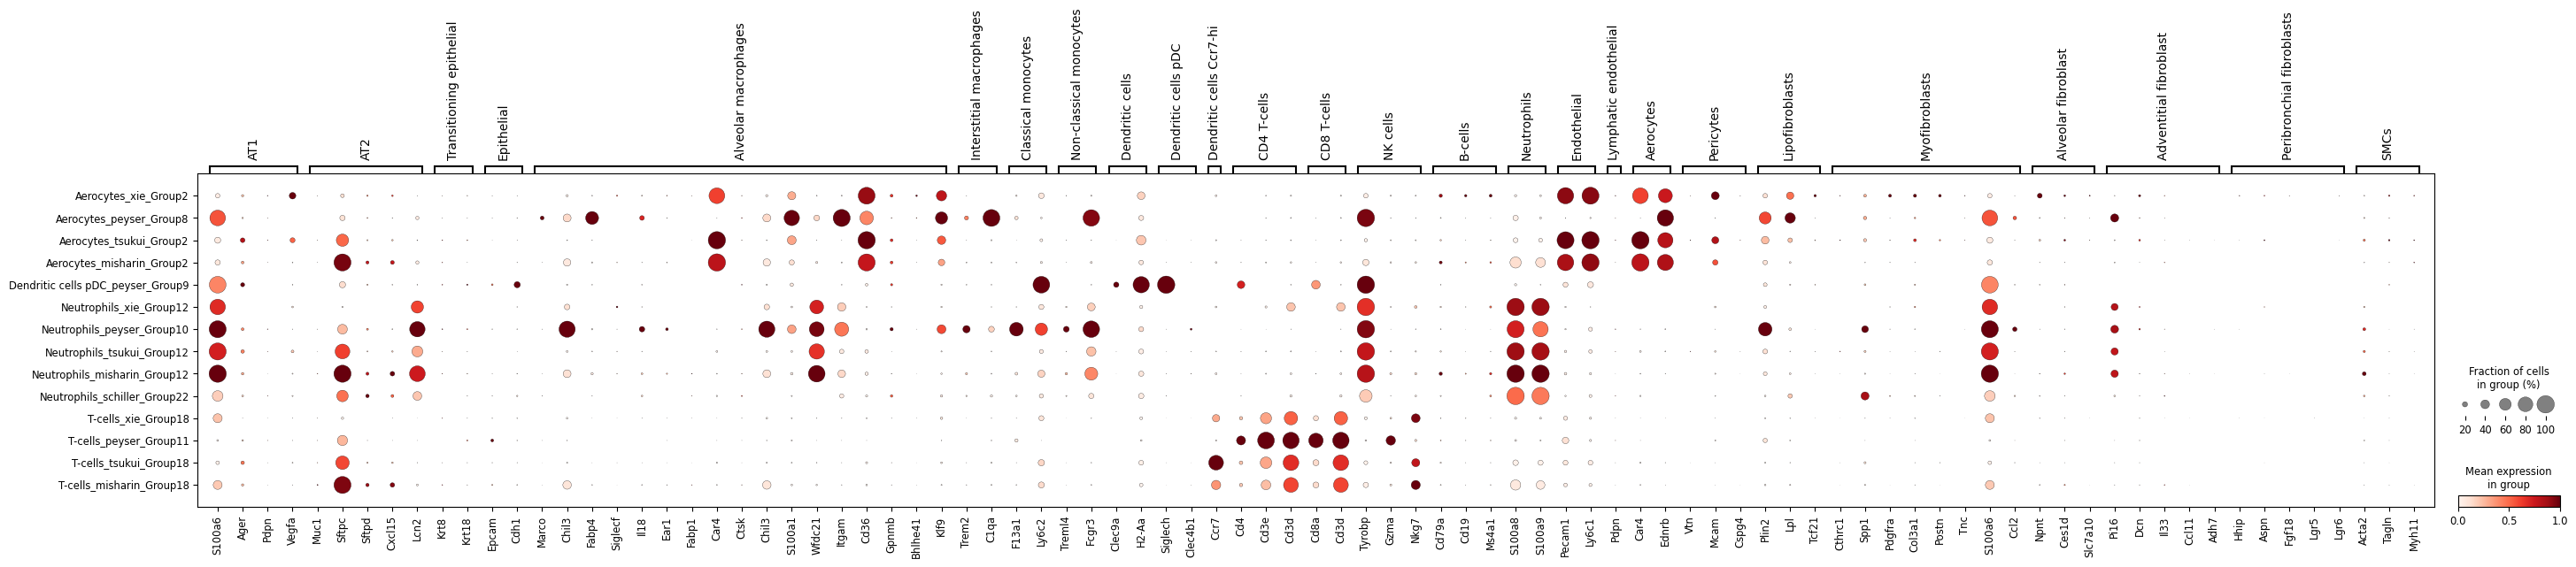

In [113]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["Aerocytes" , "Dendritic cells pDC", "Neutrophils", "T-cells"])], all_marker_genes, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


- group 8 peyser aerocytes --> rennotate, see monocyte, macrophages group (Group6)
- group 9 dendrtitc pdc cells --> Dendrtitc
- group 10 is fine, wrongly grouped
- group 11 is fine, wrongly grouped 

#### reanno

In [37]:
adata.obs.loc[(adata.obs['dataset'] == 'peyser') &
       #(adata.obs['high_hierarchy'] == 'Group3') &
       (adata.obs['manual_celltype_annotation'] == 'Dendritic cells pDC') ,
       'harmonized_anno'] = "Dendritic cells"

### Peribronchial fibroblasts

In [114]:
alignment.relation[alignment.groups == 'Group13']

tsukui relation                        xie relation  \
16  Peribronchial fibroblasts        =  Peribronchial fibroblasts        =   

   misharin relation peyser relation schiller  
16     NONE        =   NONE        =     NONE

In [117]:
peri_marker = {"Peribronchial fibroblasts": ["Hhip", "Aspn", "Fgf18", "Lgr5", "Lgr6"],
  "SMCs": ["Acta2", "Tagln", "Myh11"]}

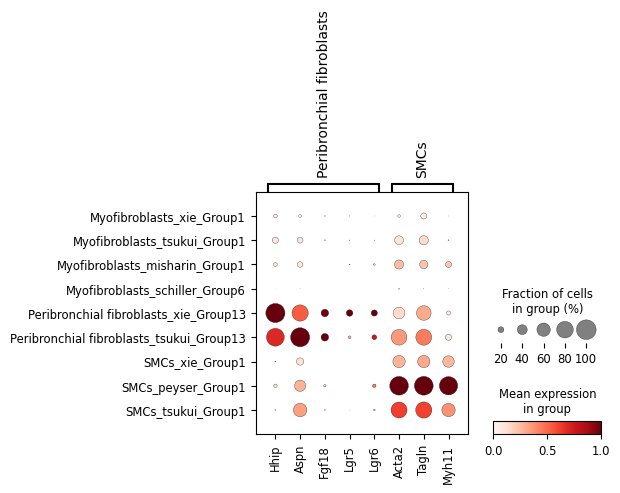

In [118]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["Peribronchial fibroblasts", "SMCs", "Myofibroblasts"])], peri_marker, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


- annotation fine, celltypist grouping misleaidng

### At1 , Alveolar fibroblast, Transitioning epithelial, Group15

In [119]:
alignment.relation[alignment.groups == 'Group15']

tsukui relation  xie relation              misharin relation  \
19  UNRESOLVED        =  AT1        =  Alveolar fibroblasts        =   

                   peyser relation schiller  
19  Lymphatic endothelial        =     NONE

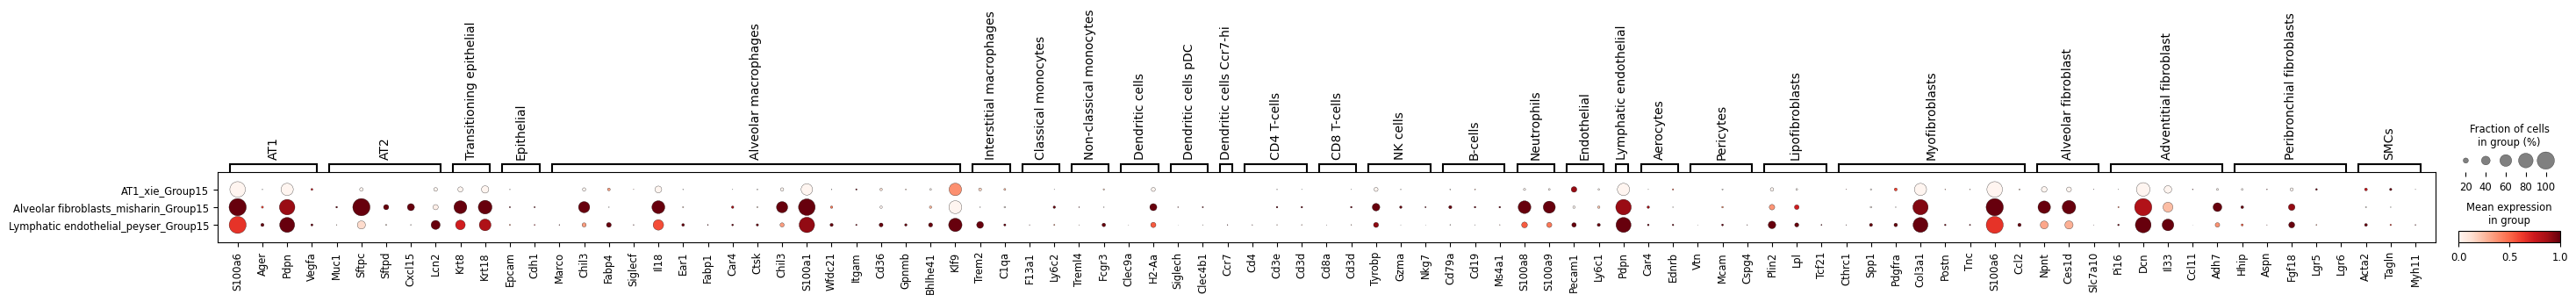

In [139]:
sc.pl.dotplot(adata[adata.obs["high_hierarchy"].isin(["Group15"])], all_marker_genes, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


- all out of group 15 --> adventitial fibroblasts or lymphatic endothelial?


#### reanno 

In [40]:
adata.obs.loc[#(adata.obs['dataset'] == 'peyser') &
       (adata.obs['high_hierarchy'] == 'Group15') ,
    #   (adata.obs['manual_celltype_annotation'] == 'Dendritic cells Ccr7-hi'),
       'harmonized_anno'] = 'Adventitial fibroblasts'


### Dendrtitc Ccr7-high 

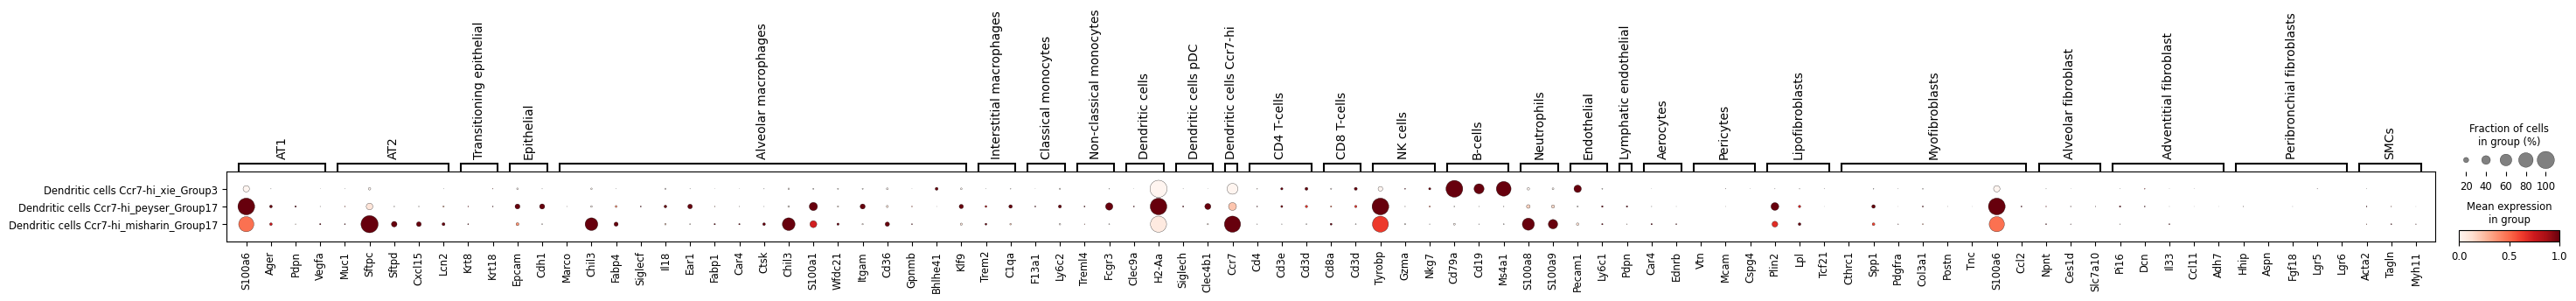

In [121]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["Dendritic cells Ccr7-hi"])], all_marker_genes, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


#### reanno

- xie resolved annotate as b-cells (as already seen in "B cells and Dendritic" section)
- peyser + misharin: dendritic or NK?


In [38]:
adata.obs.loc[#(adata.obs['dataset'] == 'peyser') &
      # (adata.obs['high_hierarchy'] == 'Group18') &
       (adata.obs['manual_celltype_annotation'] == 'Dendritic cells Ccr7-hi'),
       'harmonized_anno'] = 'Dendritic cells'


### T cells 

In [123]:
alignment.relation[alignment.groups == 'Group18']

tsukui relation      xie relation misharin relation       peyser relation  \
0  T-cells        =  T-cells        =  T-cells        =  CD4 T-cells        =   

  schiller  
0       NA

In [124]:
t_markers = {"CD4 T-cells": ["Cd4", "Cd3e", "Cd3d"],
  "CD8 T-cells": ["Cd8a", "Cd3d"],}

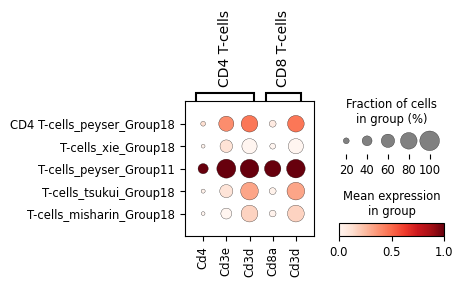

In [125]:
sc.pl.dotplot(adata[adata.obs["manual_celltype_annotation"].isin(["T-cells", "CD4 T-cells"])], t_markers, groupby=['manual_celltype_annotation', "dataset", "high_hierarchy"],  standard_scale="var")


#### reanno

- peyser CD4 T-cells to T-cells

In [18]:
adata.obs.loc[(adata.obs['dataset'] == 'peyser') &
      # (adata.obs['high_hierarchy'] == 'Group18') &
       (adata.obs['manual_celltype_annotation'] == 'CD4 T-cells'),
       'harmonized_anno'] = 'T-cells'


In [19]:
adata.obs.loc[(adata.obs['dataset'] == 'peyser') &
      # (adata.obs['high_hierarchy'] == 'Group18') &
       (adata.obs['manual_celltype_annotation'] == 'CD4 T-cells'),
       'coarse_harmonized_anno'] = 'T-cells'

# Coarse harmonized Anno 

In [5]:
adata.obs["harmonized_anno"].cat.categories

Index(['AT1', 'AT2', 'Adventitial fibroblasts', 'Aerocytes',
       'Alveolar fibroblasts', 'Alveolar macrophages', 'B-cells',
       'CD4 T-cells', 'Classical monocytes', 'Dendritic cells',
       'Dendritic cells Ccr7-hi', 'Dendritic cells pDC', 'Endothelial',
       'Epithelial', 'Interstitial macrophages', 'Lymphatic endothelial',
       'Myofibroblasts', 'NA', 'NK cells', 'Neutrophils',
       'Non-classical monocytes', 'Peribronchial fibroblasts', 'SMCs',
       'T-cells', 'Transitioning epithelial', 'AT1/2'],
      dtype='object')

In [6]:
adata.obs["coarse_harmonized_anno"] = adata.obs["harmonized_anno"]

In [9]:
adata.obs['coarse_harmonized_anno'] = adata.obs['coarse_harmonized_anno'].cat.add_categories(['Fibroblasts'])

In [10]:
adata.obs.loc[(adata.obs['harmonized_anno'] == 'Adventitial fibroblasts') |
       (adata.obs['harmonized_anno'] == 'Alveolar fibroblasts') |
       (adata.obs['harmonized_anno'] == 'Peribronchial fibroblasts'),
       'coarse_harmonized_anno'] = 'Fibroblasts'


In [11]:
adata.obs.loc[(adata.obs['harmonized_anno'] == 'AT1/2') |
       (adata.obs['harmonized_anno'] == 'Transitioning epithelial') ,
       'coarse_harmonized_anno'] = 'Epithelial'

In [26]:
adata.write("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")

# Celltypist with coarse harmonized anno 

In [20]:
new_alignment_coarse = celltypist.harmonize(adata, 'dataset', 'coarse_harmonized_anno')

👀 Detected PCA coordinates in the object, will use these to calculate distances
🏆 Reordering datasets
🖇 Harmonizing cell types of misharin and xie
🖇 Harmonizing cell types of tsukui
🖇 Harmonizing cell types of peyser
🖇 Harmonizing cell types of schiller
🖋️ Reannotating cells
✅ Harmonization done!


In [21]:
new_alignment_coarse.write('/home/p/pohll/Desktop/MP/data/celltypist_new_alignment_coarse.pkl')

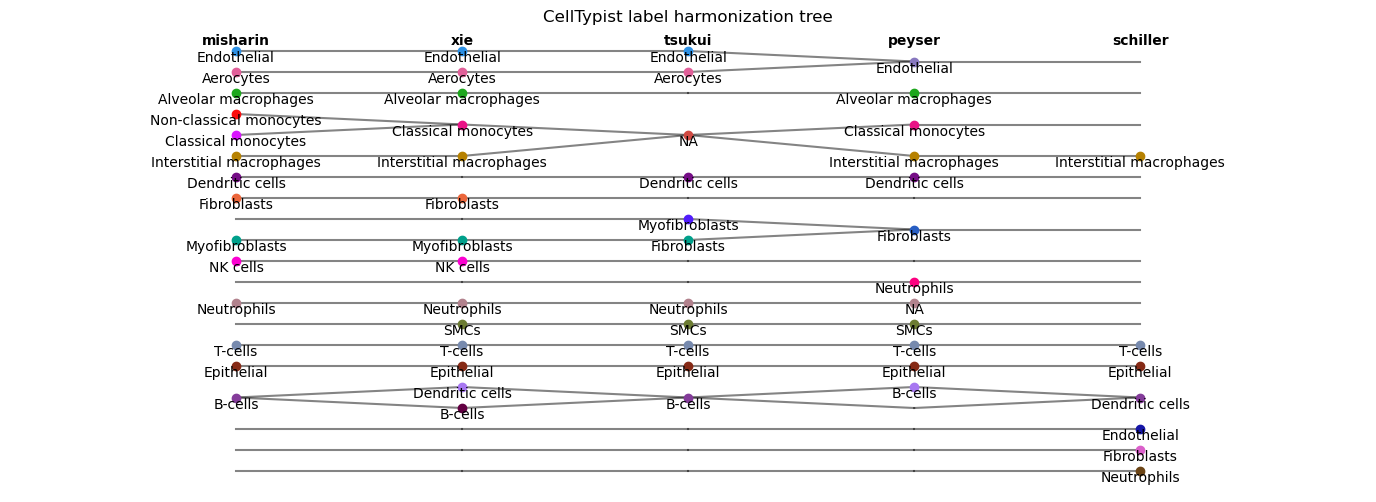

In [22]:
celltypist.treeplot(new_alignment_coarse)

- tsukui NA --> monocytes/macrophages 

# Celltypist with finer harmonized anno 

In [23]:
new_alignment_fine = celltypist.harmonize(adata, 'dataset', 'harmonized_anno')

👀 Detected PCA coordinates in the object, will use these to calculate distances
🏆 Reordering datasets
🖇 Harmonizing cell types of misharin and xie
🖇 Harmonizing cell types of tsukui
🖇 Harmonizing cell types of peyser
🖇 Harmonizing cell types of schiller
🖋️ Reannotating cells
✅ Harmonization done!


In [24]:
new_alignment_fine.write('/home/p/pohll/Desktop/MP/data/celltypist_new_alignment_fine.pkl')

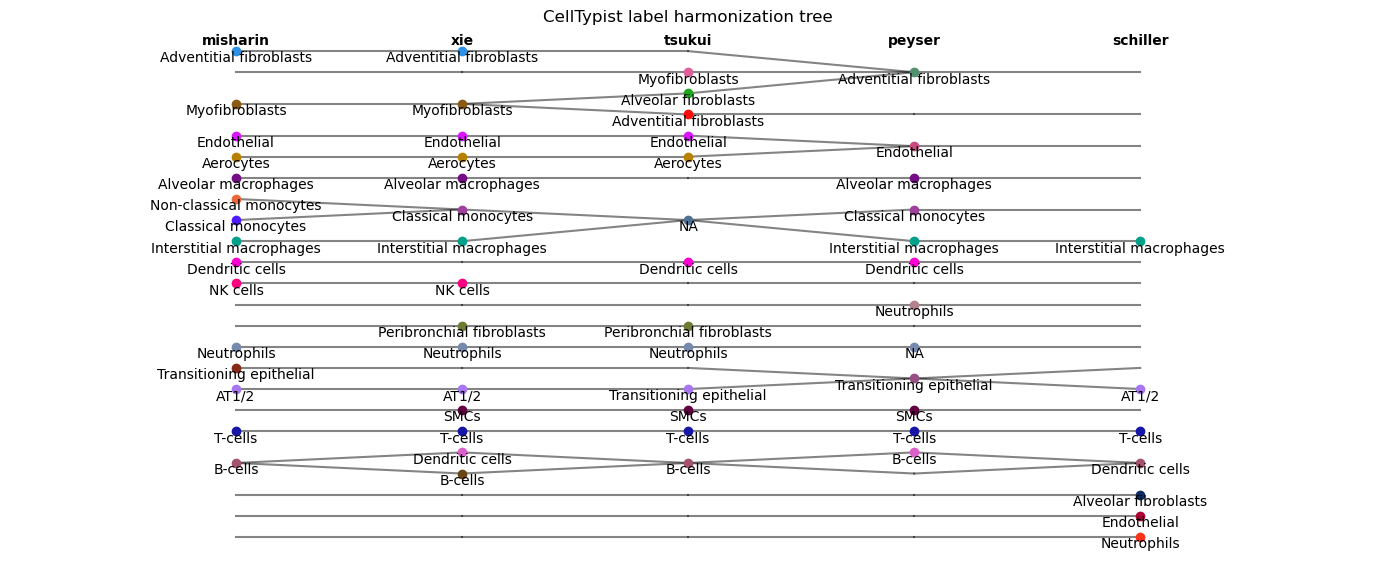

In [27]:
celltypist.treeplot(new_alignment_fine)